In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("sales_data_sample.csv", encoding="ISO-8859-1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [10]:
features= df[['SALES', 'QUANTITYORDERED']]
features=features.dropna()

In [11]:
print(features)

        SALES  QUANTITYORDERED
0     2871.00               30
1     2765.90               34
2     3884.34               41
3     3746.70               45
4     5205.27               49
...       ...              ...
2818  2244.40               20
2819  3978.51               29
2820  5417.57               43
2821  2116.16               34
2822  3079.44               47

[2823 rows x 2 columns]


In [13]:
wcss=[]

for k in range(1,11):
    k_means=KMeans(n_clusters=k, init="k-means++", random_state=42)
    k_means.fit(features)
    wcss.append(k_means.inertia_)

C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

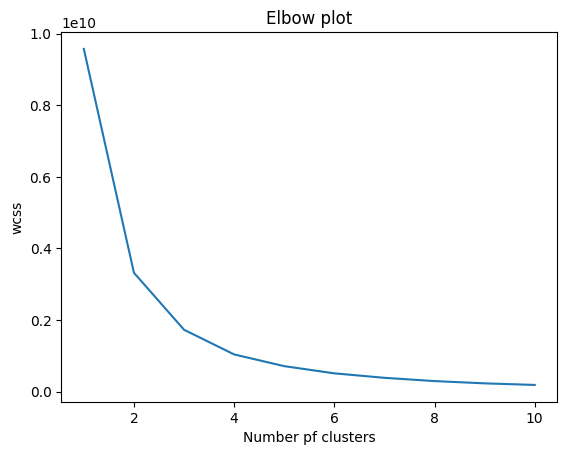

In [15]:
plt.plot(range(1,11),wcss)
plt.title("Elbow plot")
plt.xlabel("Number pf clusters")
plt.ylabel("wcss")
plt.show()

In [16]:
kmeans= KMeans(n_clusters=3, init="k-means++", random_state=42)
features['Clusters']= kmeans.fit_predict(features)

C:\Users\SAHIL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


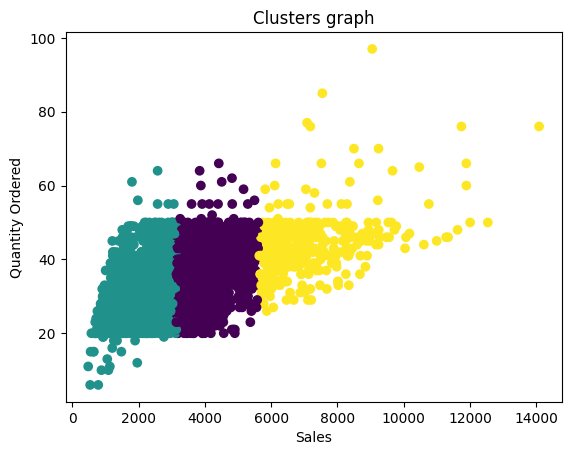

In [17]:
plt.scatter(features['SALES'], features['QUANTITYORDERED'], c=features['Clusters'], cmap="viridis")
plt.title("Clusters graph")
plt.xlabel("Sales")
plt.ylabel("Quantity Ordered")
plt.show()